# Packages

In [179]:
# data
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

# Read In Data

In [180]:
data = pd.read_csv('indie_alt_music_data.csv')

In [181]:
data.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,tøm hughes,obvious,30,[],Lo-fi Indie,0.626,0.287,5,-19.453,0,...,0.000000,0.2290,0.268,107.815,4CsSN0KzU3bqhkrA7P3kIw,spotify:track:4CsSN0KzU3bqhkrA7P3kIw,https://api.spotify.com/v1/tracks/4CsSN0KzU3bq...,https://api.spotify.com/v1/audio-analysis/4CsS...,189239,4
2,Amnesia Scanner,AS Too Wrong,38,"['art pop', 'deconstructed club', 'escape room...",Terra Incognita,0.568,0.815,2,-5.798,1,...,0.021200,0.3540,0.134,102.023,0rCbNEFbEJPWffx6BmRH9Z,spotify:track:0rCbNEFbEJPWffx6BmRH9Z,https://api.spotify.com/v1/tracks/0rCbNEFbEJPW...,https://api.spotify.com/v1/audio-analysis/0rCb...,254500,4
3,Lisel,In the Dome,13,[],Ambiente,0.317,0.479,2,-10.785,1,...,0.543000,0.0978,0.112,88.383,1WUXUrTgHIYK2F2pb5bvS7,spotify:track:1WUXUrTgHIYK2F2pb5bvS7,https://api.spotify.com/v1/tracks/1WUXUrTgHIYK...,https://api.spotify.com/v1/audio-analysis/1WUX...,176695,4
4,beabadoobee,Worth It,51,"['bedroom pop', 'bubblegrunge', 'indie pop']",Women of Indie,0.576,0.751,2,-5.256,1,...,0.000459,0.0501,0.380,103.009,3r1qdSsvJEwiMKHeCWapMM,spotify:track:3r1qdSsvJEwiMKHeCWapMM,https://api.spotify.com/v1/tracks/3r1qdSsvJEwi...,https://api.spotify.com/v1/audio-analysis/3r1q...,194173,4


In [182]:
data.loc[0]

Artist Name                                                     James
Track Name                                                       Laid
Popularity                                                         66
Genres              ['britpop', 'madchester', 'new wave', 'new wav...
Playlist                                              Alternative 90s
danceability                                                    0.457
energy                                                          0.909
key                                                                 0
loudness                                                       -9.451
mode                                                                1
speechiness                                                    0.0317
acousticness                                                   0.0016
instrumentalness                                             0.000276
liveness                                                        0.135
valence             

# Motivation

The motivation for this mini-project is to find the ideal set of parameters that maximizes the popularity of a track in a given genre. We will begin with data from the indie_alt_music dataset, and then we will expand to analyze the rest of the provided genre datasets.

Above, we can see the layout of the dataset, as well as an example of all the data provided in a single example row. Naturally, we will omit extra information before processing the data.

# Cleaning the Data

In [183]:
drop_these_columns = ['Artist Name',
                     'Track Name',
                     'Genres',
                     'Playlist',
                     'mode',
                     'id',
                     'uri',
                     'track_href',
                     'analysis_url']

data.drop(drop_these_columns, inplace=True, axis=1)

In [184]:
# we've dropped all columns that aren't of a numerical dtype or aren't essential to our analysis
data.head()

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,66,0.457,0.909,0,-9.451,0.0317,0.00160,0.000276,0.1350,0.755,115.998,156667,4
1,30,0.626,0.287,5,-19.453,0.4150,0.89800,0.000000,0.2290,0.268,107.815,189239,4
2,38,0.568,0.815,2,-5.798,0.0528,0.00555,0.021200,0.3540,0.134,102.023,254500,4
3,13,0.317,0.479,2,-10.785,0.0341,0.83500,0.543000,0.0978,0.112,88.383,176695,4
4,51,0.576,0.751,2,-5.256,0.0269,0.01250,0.000459,0.0501,0.380,103.009,194173,4


In [185]:
data.isnull().sum()

Popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

We can see the data doesn't contain any null values and we can omit this step.

# Splitting the Data

In [186]:
df_train, df_test = model_selection.train_test_split(data, test_size=0.2)

# Scaling the Features and Target Variable

In [187]:
# scaling the feature variables
train_feature_scaler = preprocessing.RobustScaler(quantile_range=(25.0,75.0))

x_train_data = train_feature_scaler.fit_transform(df_train.drop('Popularity',axis=1))
df_train_scaled = pd.DataFrame(x_train_data, columns=df_train.drop('Popularity',axis=1).columns, index=df_train.index)

# scaling the target variables
train_target_scaler = preprocessing.RobustScaler(quantile_range=(25.0,75.0))

df_train_scaled['Popularity'] = train_target_scaler.fit_transform(df_train['Popularity'].values.reshape(-1,1))

In [188]:
# scaling the feature variables for test data
test_feature_scaler = preprocessing.RobustScaler(quantile_range=(25.0,75.0))

x_test_data = test_feature_scaler.fit_transform(df_test.drop('Popularity',axis=1))
df_test_scaled = pd.DataFrame(x_test_data, columns=df_test.drop('Popularity',axis=1).columns, index=df_test.index)

# scaling the target variables for test data
test_target_scaler = preprocessing.RobustScaler(quantile_range=(25.0,75.0))

df_test_scaled['Popularity'] = test_target_scaler.fit_transform(df_test['Popularity'].values.reshape(-1,1))

In [189]:
df_scaled.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Popularity
4306,-0.094017,0.967638,0.000000,1.214371,-0.056213,-0.189265,2.435682,1.428571,0.403061,0.216902,0.725868,0.0,-0.458333
4317,-0.871795,0.786408,0.000000,1.171434,3.420118,-0.182387,-0.032761,0.565908,-0.137755,1.430646,-1.148540,-1.0,-0.125000
4224,0.850427,-0.048544,-0.285714,-0.385932,2.710059,0.423714,2.346164,-0.359558,-0.719388,0.001188,0.793871,0.0,0.166667
2798,-0.709402,0.249191,-0.571429,-0.089158,0.026627,0.827252,2.248509,-0.236025,0.673469,-0.820427,15.562632,0.0,-1.000000
1053,-0.299145,0.362460,0.571429,-0.076277,-0.272189,0.780124,0.395775,-0.252588,0.403061,-1.294664,-0.562698,0.0,0.958333


Note that popularity has been rescaled to take on values (roughly) between -1 and 1

# Check for Collinearity

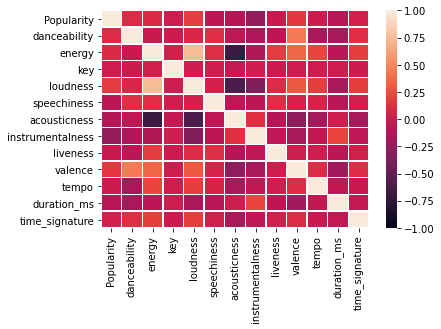

In [190]:
corr_matrix = df_train.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1., fmt='.2f', cbar=True, linewidths=0.5);

The parameters 'loudness' and 'energy' are not *strongly* correlated, however, they are much more correlated than the rest of the data it is best to drop one, especially considering that in a general evaluation outside of the data values, one would expect these parameters to be correlated

In [191]:
# removing the 'energy' parameter for training
updated_df_train = df_train_scaled.drop('energy',axis=1)

# removing the 'energy' parameter for test data
updated_df_test = df_test_scaled.drop('energy',axis=1)

In [192]:
# defining our final training variables
x_train = updated_df_train.drop('Popularity',axis=1).values
y_train = updated_df_train['Popularity'].values

# defining our final testing variables
x_test = updated_df_test.drop('Popularity',axis=1).values
y_test = updated_df_test['Popularity'].values

# Modeling the Pre-Processed Data

In [210]:
model = LinearRegression()
cv = model_selection.KFold(n_splits=5, shuffle=True)

# fitting the training data with the Linear Regression model
model.fit(x_train, y_train)

# predicting the training data with the unscaled testing data
predicted = model.predict(x_test)

predicted = train_target_scaler.inverse_transform(predicted.reshape(-1,1)).reshape(-1)

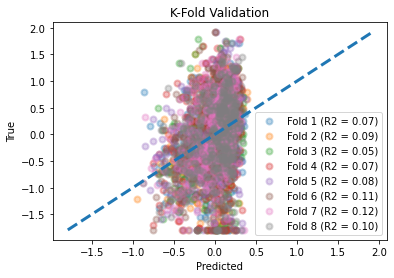

In [219]:
# setting up the k-fold cross validation
scores = []
cv = model_selection.KFold(n_splits=8, shuffle=True)
fig = plt.figure()
i = 1

for train, test in cv.split(x_train, y_train):
    prediction = model.fit(x_train[train],
                 y_train[train]).predict(x_train[test])
    
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1

# plotting the data for the k-fold cross validation
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=3,)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [211]:
# reshaping y_test
y_test_reshaped = train_target_scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1)

# Analysis of the Results

As we can see, this program did not do what we initially expected. Since this is a simple model, accuracy is not expected to be high regardless. However, given our data, we can deduce a few things. First, the actual data itself are pre-determined metrics given possibly arbitrary values that cannot be considered to be sufficiently credible data as we do not know how these values were found. For example, while some parameters such as 'tempo' are easy to measure and have validity in actual analysis of music, other paramaters such as 'danceability' lack in credibility as a real measure for a song. Since we intended to analyze multiple genres of music, we would expect to see certain parameters such as this one vary across different genres. Certainly, more popular songs in genres such as our 'pop_music_dataset' have more 'danceability' than popular songs in our 'blues_music' dataset, but exactly how this is measured is beyond the scope of the program.

# Sources

Machine Learning with Python: Regression (complete tutorial): https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea

K-Fold Cross-Validation in Python Using SKLearn: https://www.askpython.com/python/examples/k-fold-cross-validation

Spotify Multi-Genre Playlists Data: https://www.kaggle.com/siropo/spotify-multigenre-playlists-data?select=indie_alt_music_data.csv

sklearn API Reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

sklearn.linear_model.LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Train-Test Split for Evaluating Machine Learning Algorithms: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/